In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#parametry sygnału
sampling_rate = 1000 #Hz (liczba próbek na sekundę)
duration = 2 #czas trwania w sekundach
t = np.linspace(0,duration,sampling_rate*duration,endpoint=False) #oś czasu

In [3]:
#opis sygnału
freq1 = 5 #częstotliwośc 1 sinusoidy w Hz
freq2 = 50 #częstotliwośc 2 sinusoidy w Hz
signal = np.sin(2*np.pi*freq1*t)+0.5 * np.sin(2*np.pi*freq2*t)

In [4]:
#dodawanie szumu
noise = 0.2 * np.random.normal(size=t.shape)
noisy_signal = signal + noise

In [6]:
#transformata Fouriera
fft = np.fft.fft(noisy_signal) #transformata sygnału
frequencies = np.fft.fftfreq(len(fft), d = 1/sampling_rate)
amplitude = np.abs(fft) #Amplituda (moduł transformaty)

In [7]:
#filtracja - usuwanie szumu wysokoczęstotliwościowego
filtered_fft = fft.copy()
filtered_fft[np.abs(frequencies)>60] = 0 #wycięcie wysokich częstotliwosci
filtered_signal = np.fft.ifft(filtered_fft) #sygnał pod odwrotnej transformacie

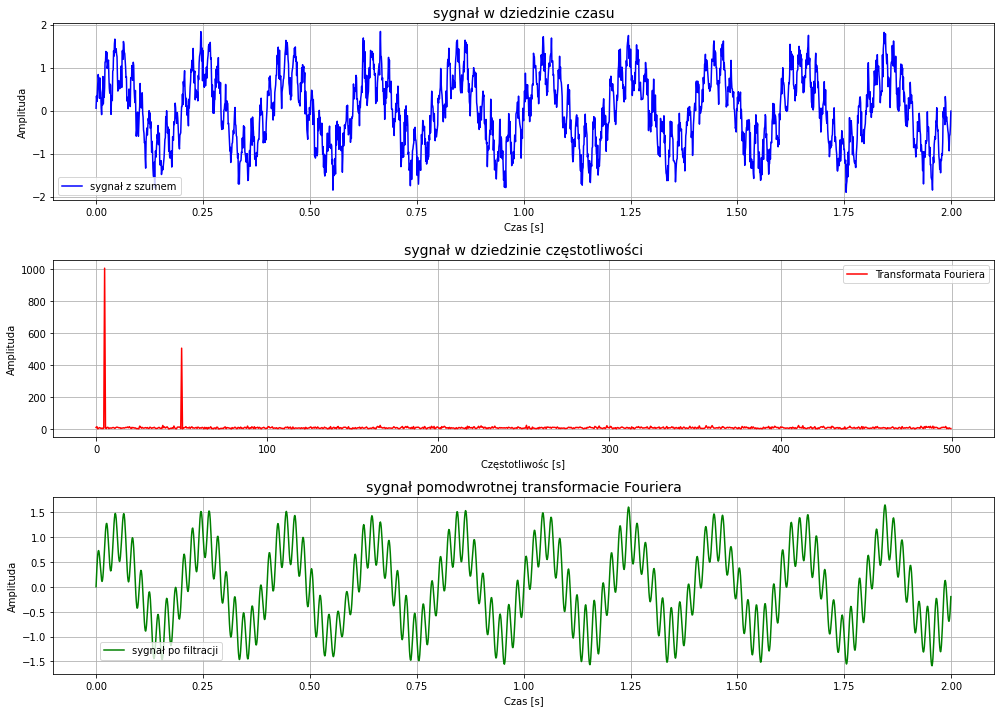

In [16]:
plt.figure(figsize=(14,10))

#oryginalny sygnał z szumem
plt.subplot(3,1,1)
plt.plot(t,noisy_signal,color='blue',label='sygnał z szumem')
plt.title("sygnał w dziedzinie czasu",fontsize=14)
plt.xlabel("Czas [s]")
plt.ylabel("Amplituda")
plt.legend()
plt.grid()

#transformata fouriera
plt.subplot(3,1,2)
plt.plot(frequencies[:len(frequencies)//2],amplitude[:len(frequencies)//2],color='red',label='Transformata Fouriera')
plt.title("sygnał w dziedzinie częstotliwości",fontsize=14)
plt.xlabel("Częstotliwośc [s]")
plt.ylabel("Amplituda")
plt.legend()
plt.grid()
plt.tight_layout()

#sygnał po filtracji
plt.subplot(3,1,3)
plt.plot(t,filtered_signal.real,color='green',label='sygnał po filtracji')
plt.title("sygnał pomodwrotnej transformacie Fouriera",fontsize=14)
plt.xlabel("Czas [s]")
plt.ylabel("Amplituda")
plt.legend(loc = (0.05,0.08))
plt.grid()
plt.tight_layout()